In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from alignment.run import runs
from alignment.constants import result_cols

In [30]:
import uncertainties.unumpy as unp

In [4]:
runs.keys()

dict_keys([3443, 3444, 3445, 3446])

In [23]:
result_tables = {}
for run in runs:    
    result_tables[run] = pd.read_pickle(f"../alignment/results/testbeam/{run}/result_table.pkl")

In [79]:
result_tables[3445]

,M0: ($\mu$m or mrad),M1: ($\mu$m or mrad),M2: ($\mu$m or mrad),M3: ($\mu$m or mrad),M4: ($\mu$m or mrad),M5: ($\mu$m or mrad),M6: ($\mu$m or mrad),M7: ($\mu$m or mrad)
Layer 0 - $x$,90.1+/-2.6,41.1+/-1.8,21.6+/-1.9,54.7+/-2.3,68.6+/-2.8,-48.1+/-2.3,-15.6+/-2.4,-5.6+/-3.0
Layer 0 - $y$,-10.3+/-2.2,-23.7+/-1.1,8.9+/-1.4,4.5+/-2.4,-23.3+/-2.5,16.4+/-2.2,-28.1+/-1.8,17.2+/-3.0
Layer 0 - $z$,6.0+/-2.1,-9.0+/-1.7,-1.9+/-1.6,-12.1+/-2.2,8.6+/-2.7,7.0+/-1.9,-11.3+/-2.1,-5.3+/-2.4
Layer 0 - $\alpha$,0.021+/-0.005,-0.0046+/-0.0020,0.0004+/-0.0015,0.0076+/-0.0013,0.029+/-0.008,-0.0034+/-0.0015,0.001+/-0.007,0.0018+/-0.0009
Layer 0 - $\beta$,0.25+/-0.06,-0.25+/-0.05,-0.01+/-0.05,-0.09+/-0.07,0.04+/-0.07,0.10+/-0.05,0.04+/-0.05,-0.00+/-0.06
Layer 0 - $\gamma$,-0.11+/-0.07,0.29+/-0.04,-0.06+/-0.04,0.58+/-0.07,-0.10+/-0.07,0.16+/-0.05,0.93+/-0.05,0.24+/-0.08
Layer 1 - $x$,-176+/-5,-88+/-4,-44+/-4,-113+/-5,-139+/-6,97+/-5,33+/-5,12+/-6
Layer 1 - $y$,4.9+/-0.9,-26.9+/-0.4,-18.8+/-0.5,24.5+/-0.8,-12.3+/-1.0,45.9+/-0.9,-44.8+/-0.7,64.0+/-1.3
Layer 1 - $z$,-12+/-4,17.8+/-3.4,3.9+/-3.3,25+/-5,-14+/-5,-17+/-4,23+/-4,11+/-5
Layer 1 - $\alpha$,-0.043+/-0.009,-0.005+/-0.004,-0.0088+/-0.0030,-0.019+/-0.004,-0.018+/-0.006,0.034+/-0.011,0.000+/-0.010,-0.009+/-0.010


In [70]:
labels = {
    0: r"$x$ [$\mu$ m]",
    1: r"$y$ [$\mu$ m]",
    2: r"$z$ [$\mu$ m]",
    3: r"$\alpha$ [mrad]",
    4: r"$\beta$ [mrad]",
    5: r"$\gamma$ [mrad]",
}

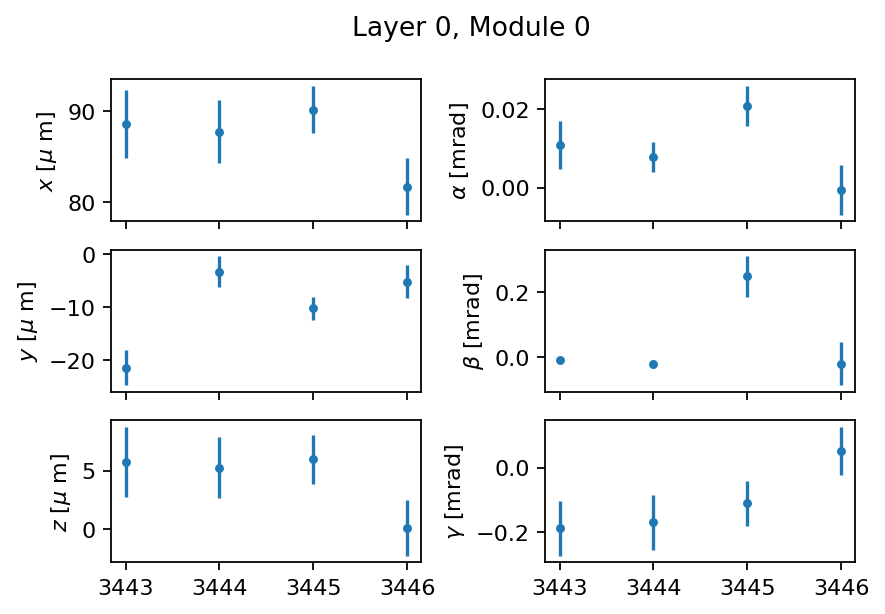

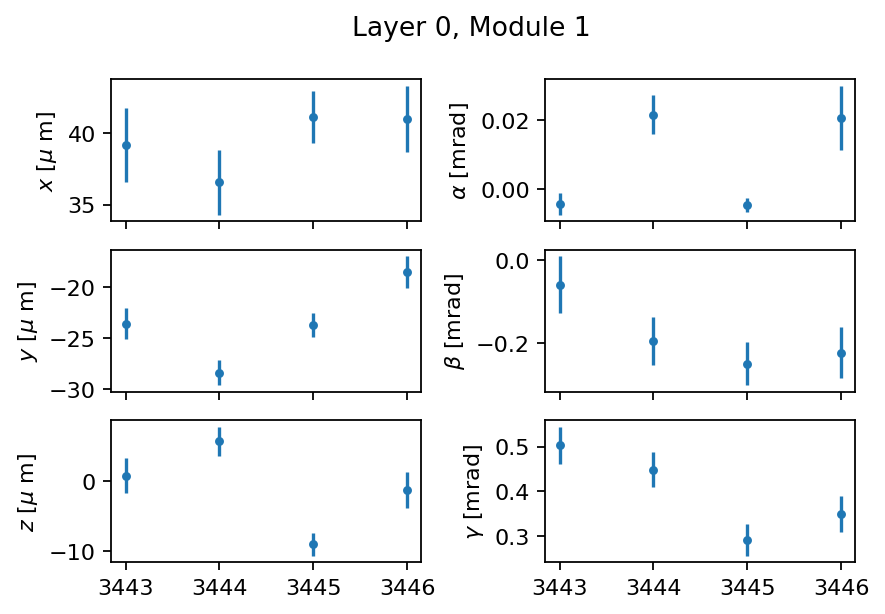

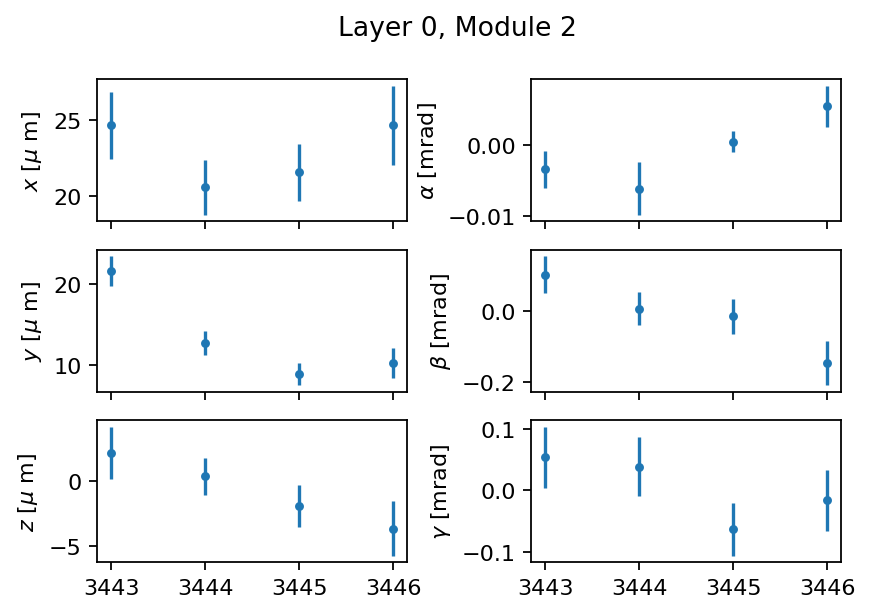

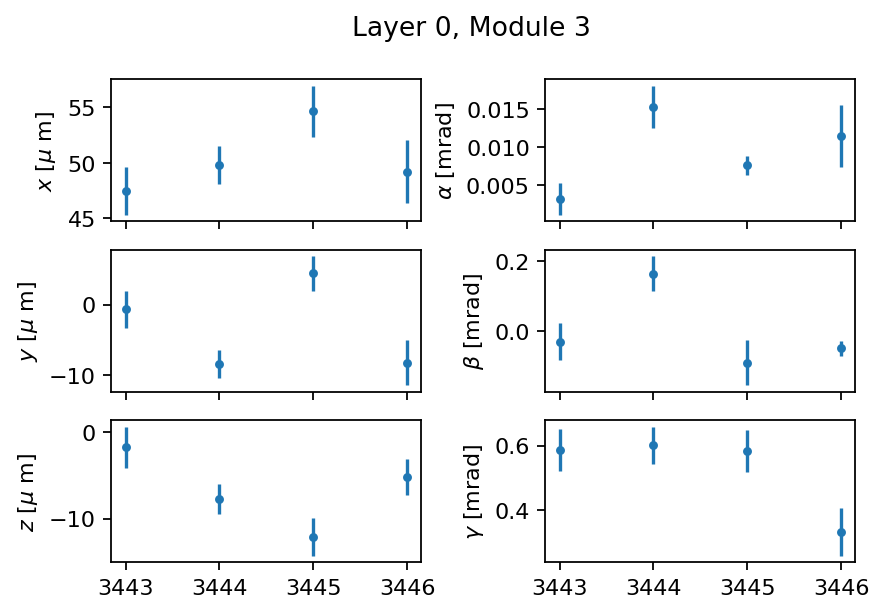

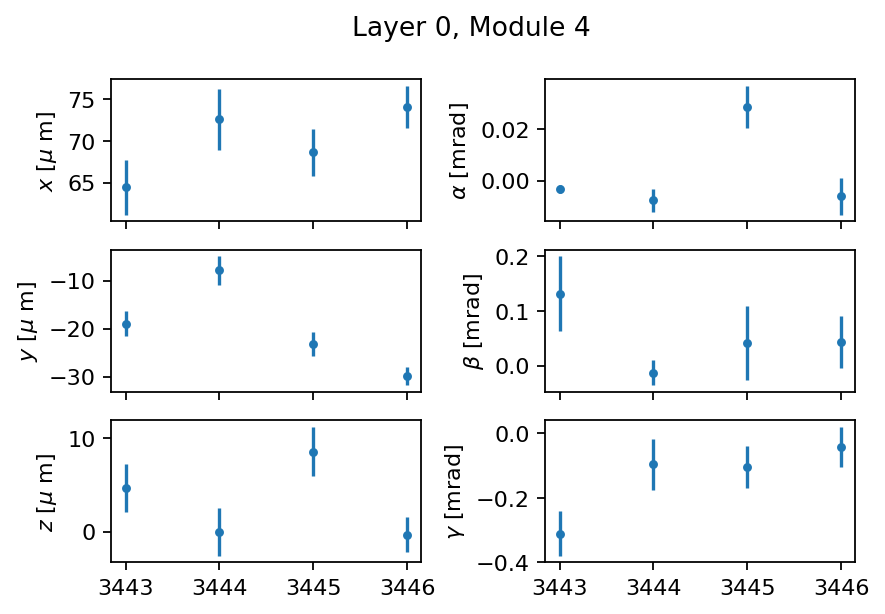

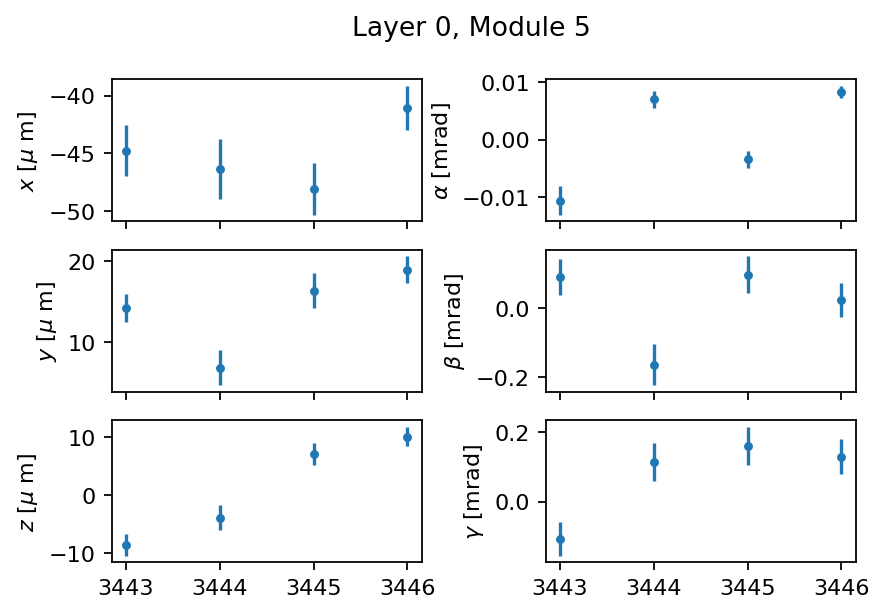

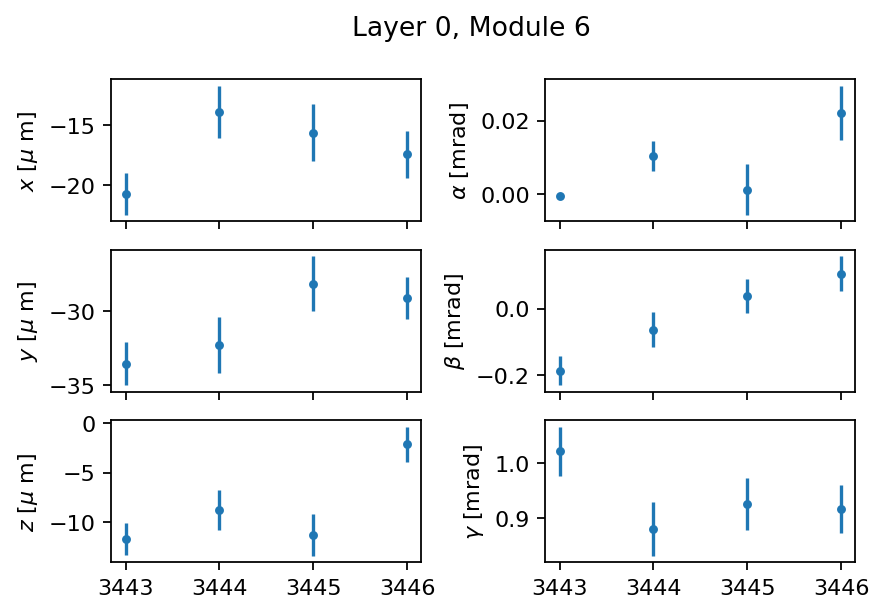

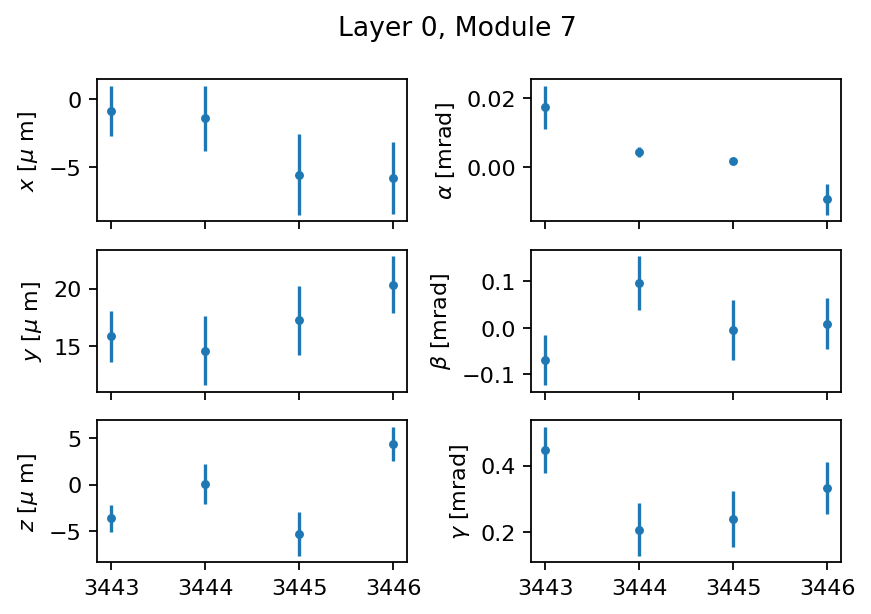

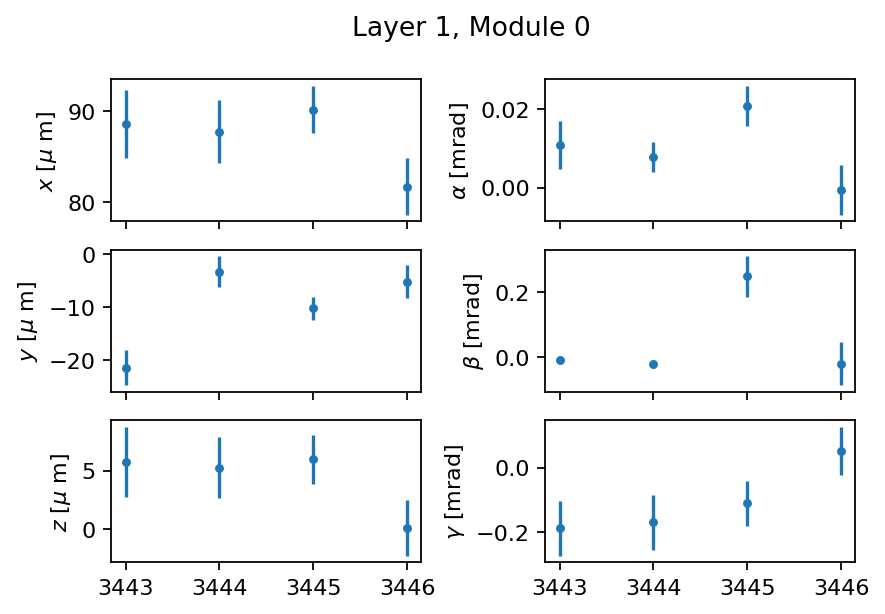

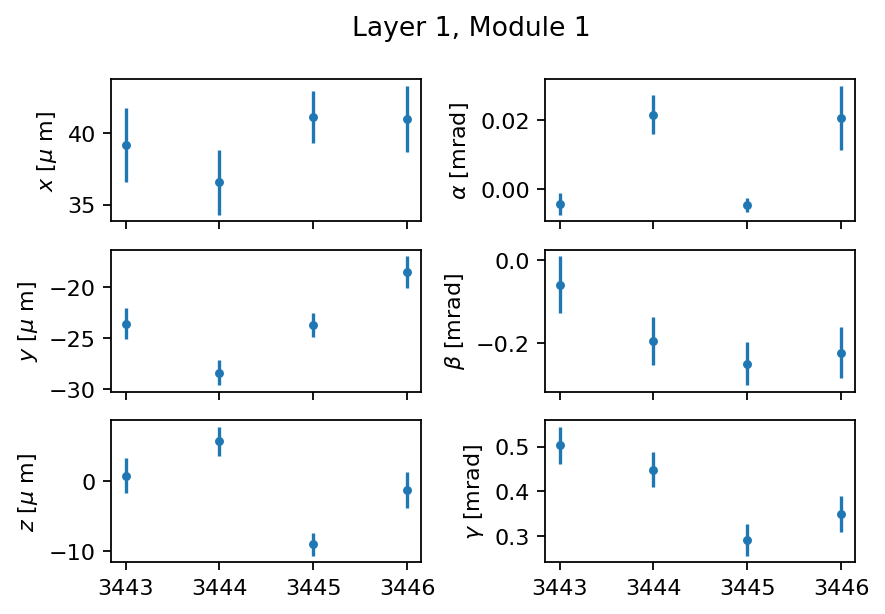

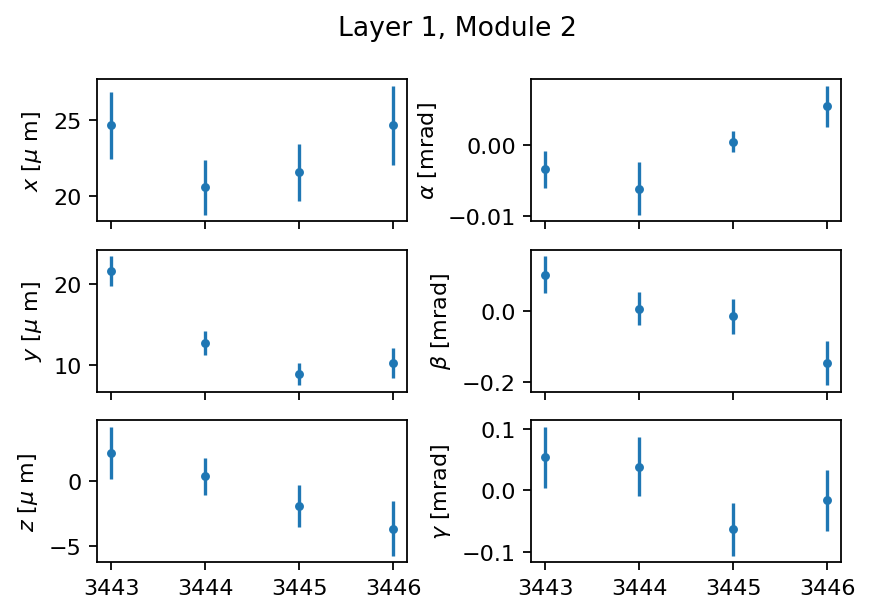

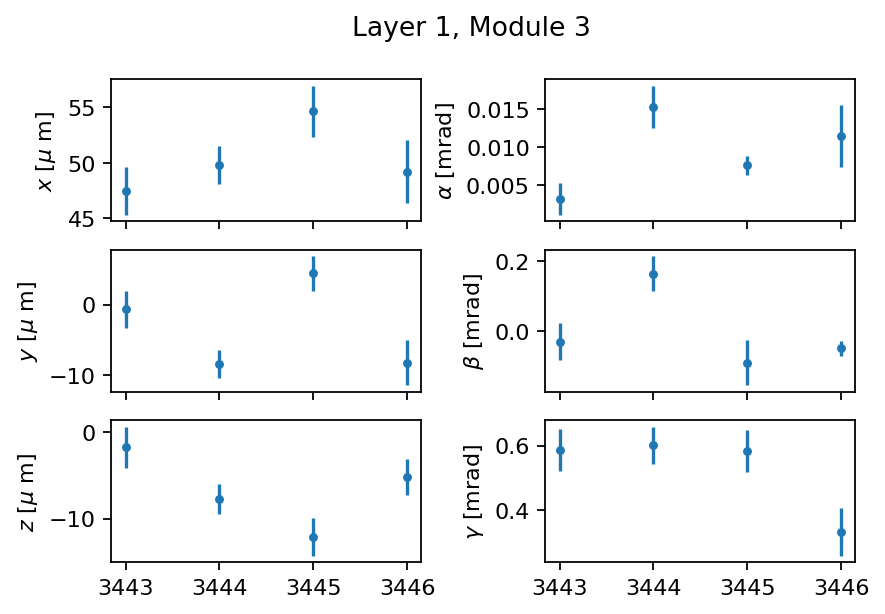

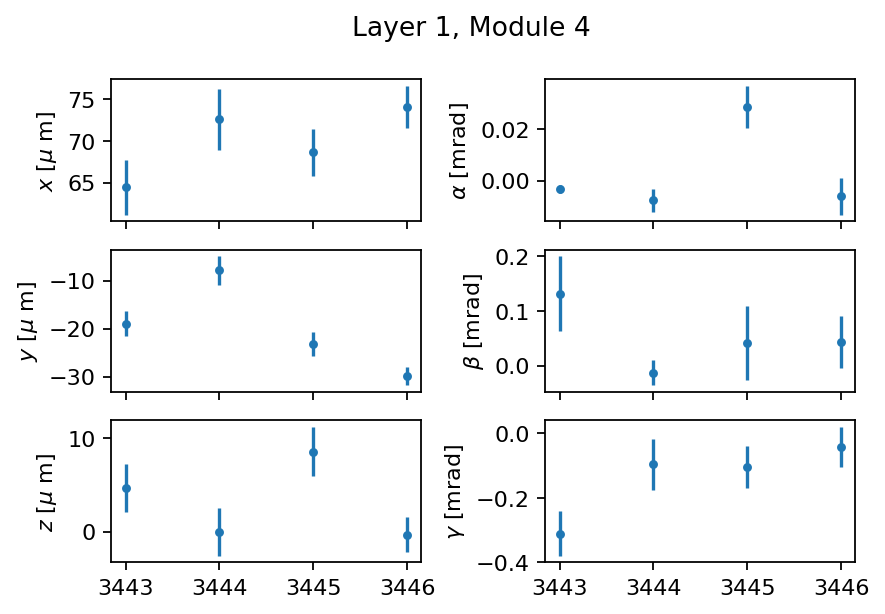

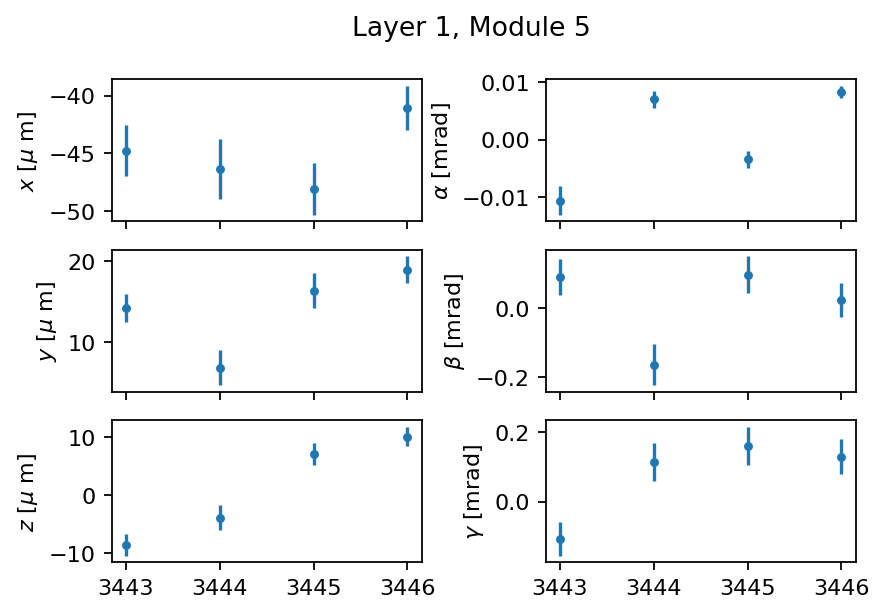

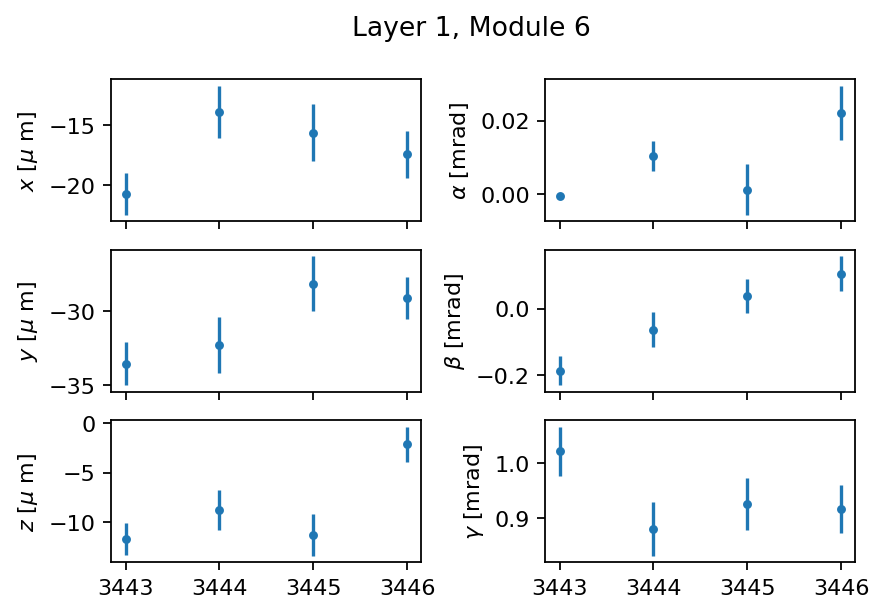

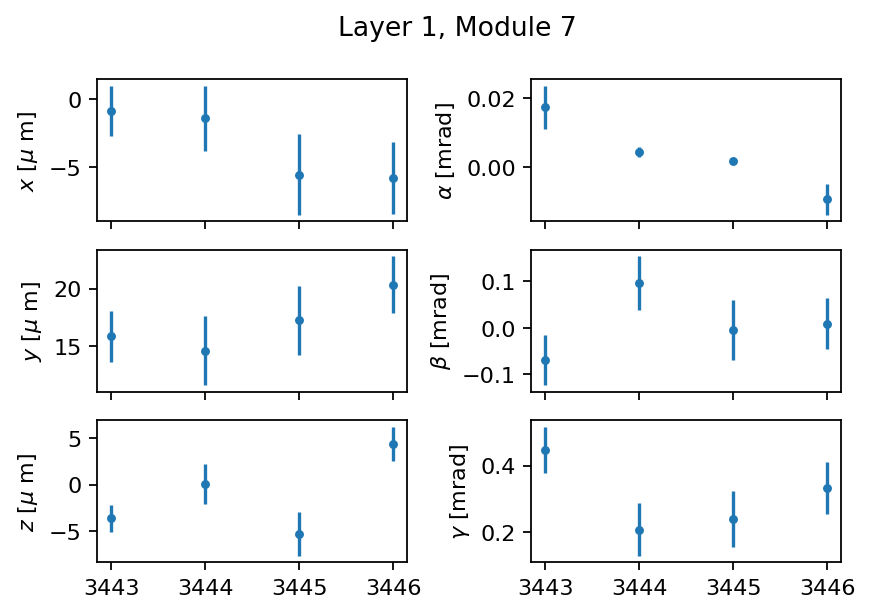

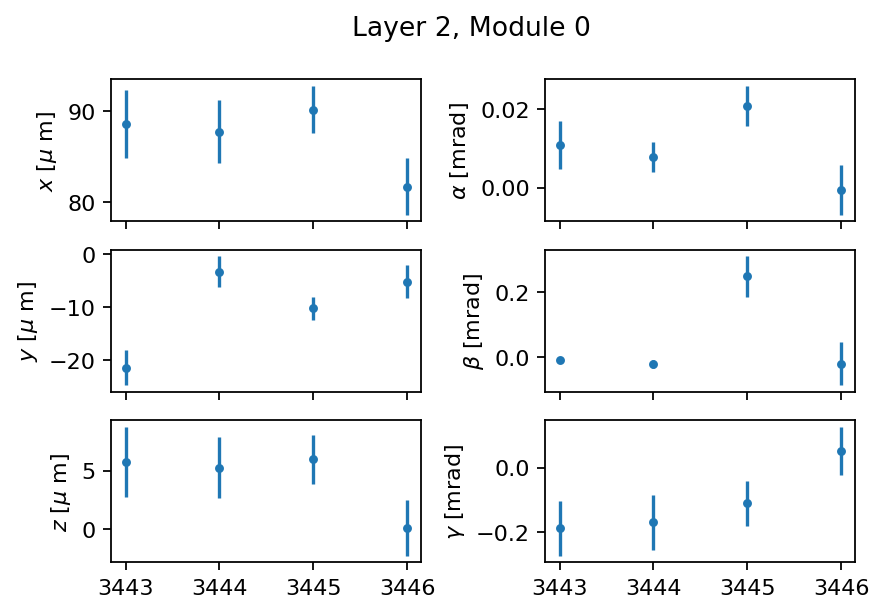

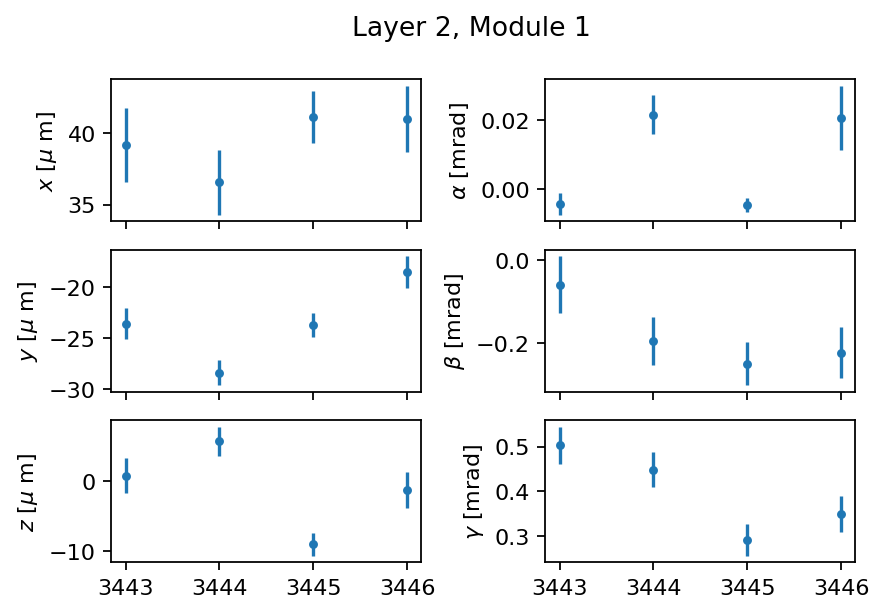

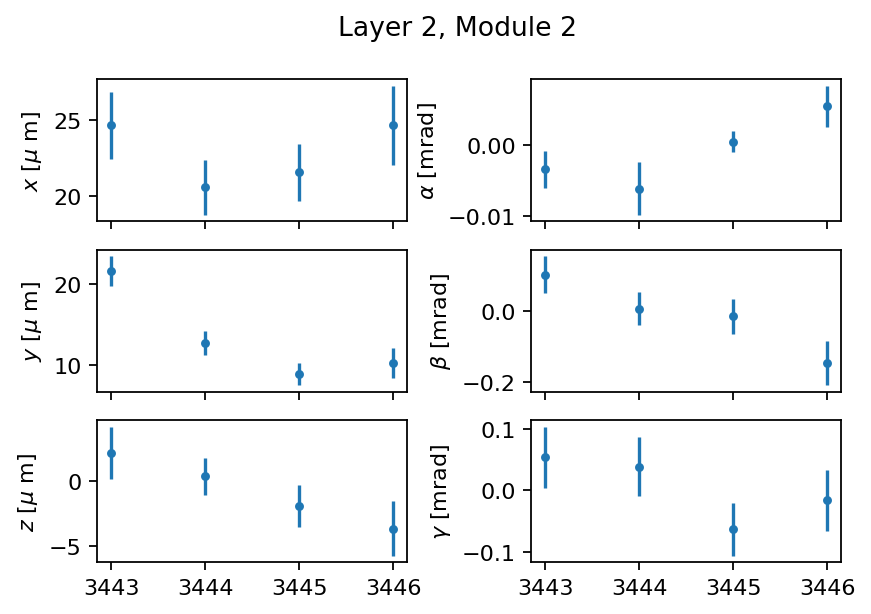

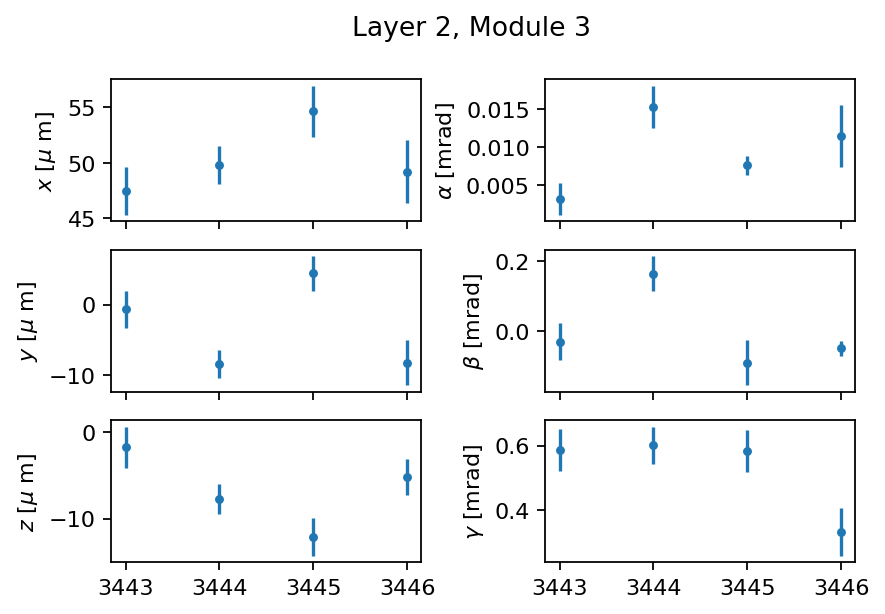

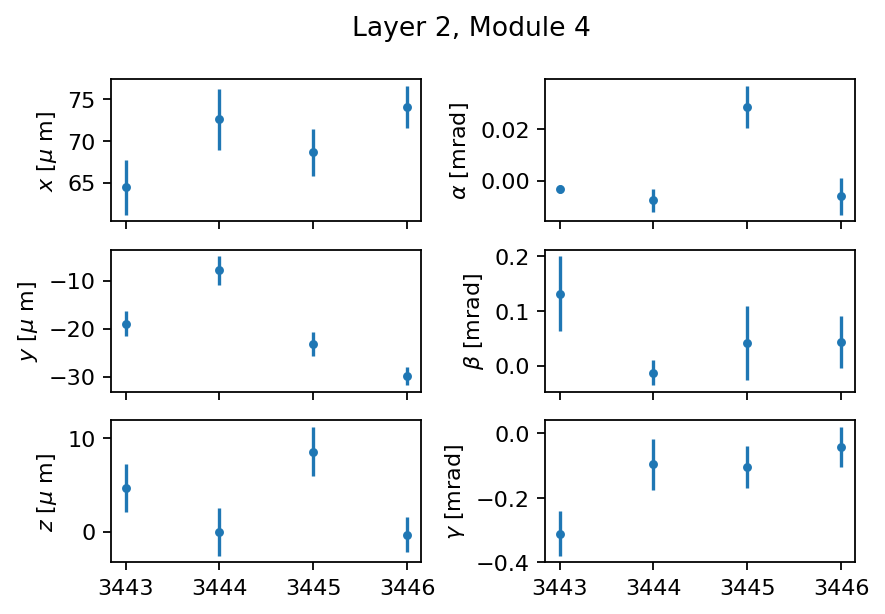

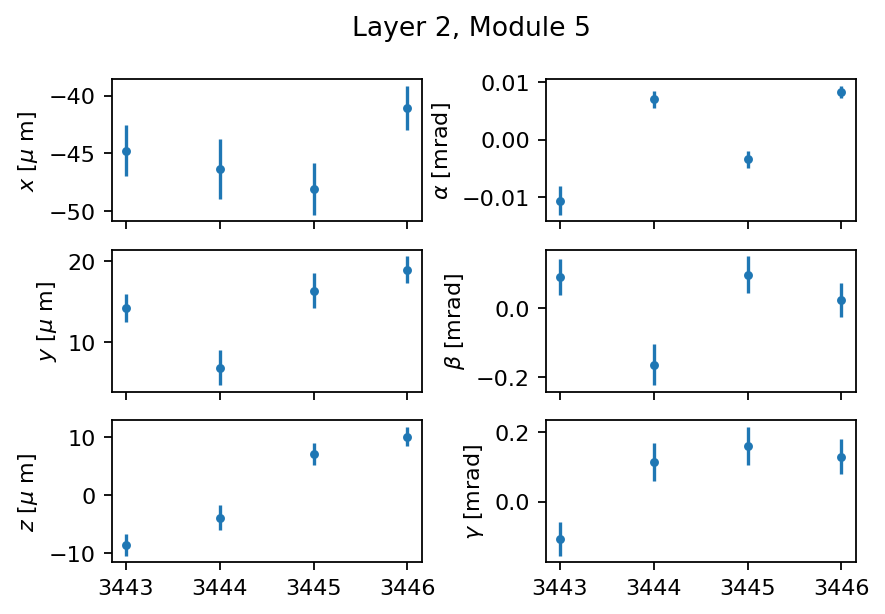

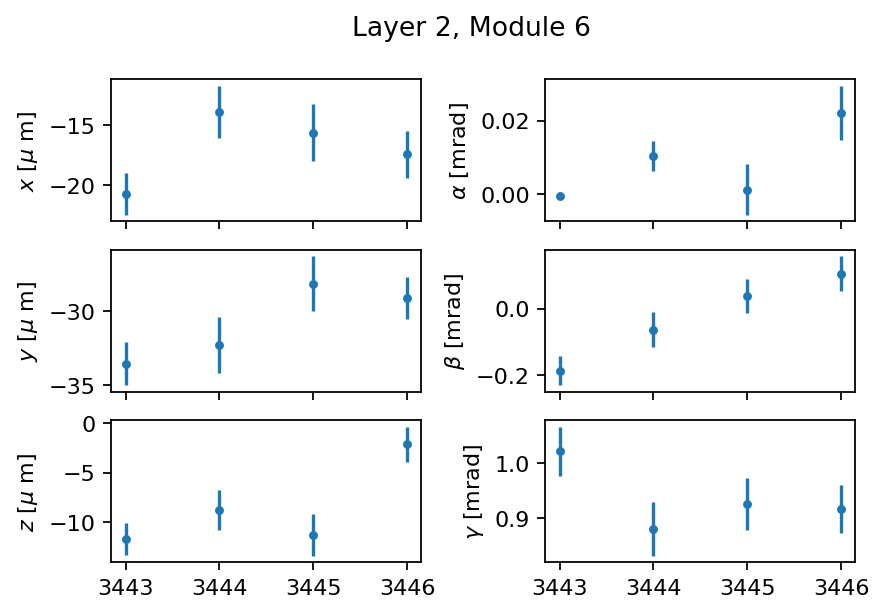

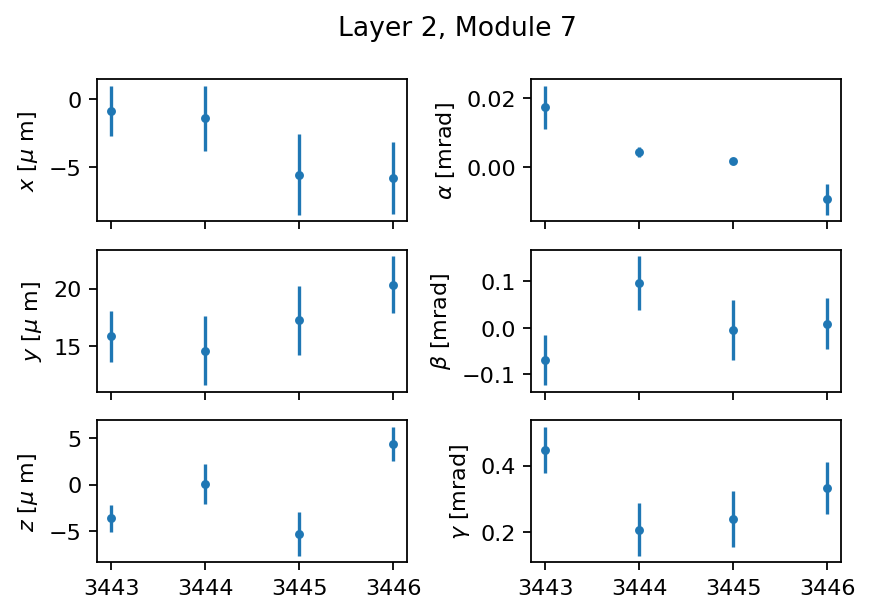

In [81]:
for layer in [0, 1, 2]:
    for module in [0, 1, 2, 3, 4, 5, 6, 7]:

        fig, axs = plt.subplots(3, 2, dpi=160, sharex=True, sharey=False, gridspec_kw={"wspace": 0.4, "hspace": 0.2})

        for i in range(3):
            axs[i, 0].errorbar(
                range(len(runs)), 
                [unp.nominal_values(result_tables[run][f"M{module}: ($\mu$m or mrad)"][i]) for run in runs],
                yerr=[unp.std_devs(result_tables[run][f"M{module}: ($\mu$m or mrad)"][i]) for run in runs],
                marker=".", ls="",
            )
            axs[i, 0].set_xticks(range(len(runs)), runs)
            axs[i, 0].set_ylabel(labels[i])

        for i in range(3):
            axs[i, 1].errorbar(
                range(len(runs)), 
                [unp.nominal_values(result_tables[run][f"M{module}: ($\mu$m or mrad)"][i+3]) for run in runs],
                yerr=[unp.std_devs(result_tables[run][f"M{module}: ($\mu$m or mrad)"][i+3]) for run in runs],
                marker=".", ls="",
            )
            axs[i, 1].set_xticks(range(len(runs)), runs)
            axs[i, 1].set_ylabel(labels[i+3])

        fig.suptitle(f"Layer {layer}, Module {module}")

        plt.show()
        plt.close()

In [ ]:
[result_tables[run][f"M0: ($\mu$m or mrad)"][0] for run in runs] # y
[result_tables[run][f"M0: ($\mu$m or mrad)"][0] for run in runs] # z
[result_tables[run][f"M0: ($\mu$m or mrad)"][0] for run in runs] # alpha
[result_tables[run][f"M0: ($\mu$m or mrad)"][0] for run in runs] # beta
[result_tables[run][f"M0: ($\mu$m or mrad)"][0] for run in runs] # gamma

plt.plot(range(2), [result_tables[run][f"M0: ($\mu$m or mrad)"][0] for run in runs])